# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Base URL for weather call
url = "http://api.openweathermap.org/data/2.5/weather?"
# create empty lists to hold our weather info.
cities_lat = []
cities_lng = []
cities_temp = []
cities_hum = []
cities_cld = []
cities_wnd = []

#create an index to use for printing debug logic
index = 1
print("""
Beginning Data Retrieval     
-----------------------------
""")
for city in cities[:]:
    # Build query URL
    query_url = url+"appid="+api_key + "&q="+city
    weather_json = requests.get(query_url+'&units=imperial').json()
    # Check if city is found in weather api DB
    if(weather_json['cod'] != 200):
        print("Skipping city not found in weather map API...")
        # Remove city from list
        cities.remove(city)
    else:
        print(f"Processing Record {index} of Set {(index//50)+1} | {city}")
        # append data to list to be created into DataFrame later
        cities_lat.append(weather_json['coord']['lat'])
        cities_lng.append(weather_json['coord']['lon'])
        cities_temp.append(weather_json['main']['temp_max'])
        cities_hum.append(weather_json['main']['humidity'])
        cities_cld.append(weather_json['clouds']['all'])
        cities_wnd.append(weather_json['wind']['speed'])
        index += 1
    #if(index > 11):
    #    break


Beginning Data Retrieval     
-----------------------------

Processing Record 1 of Set 1 | bredasdorp
Skipping city not found in weather map API...
Processing Record 2 of Set 1 | pontal do parana
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | chodavaram
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | rikitea
Skipping city not found in weather map API...
Processing Record 12 of Set 1 | vila franca do campo
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | padang
Skipping city not found in weather map API...
Processing Record 15 of Set 1 | kodiak
Skipping city not found in weather map API...
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | port lincoln
Skipping city not found in weather map A

Processing Record 175 of Set 4 | georgetown
Processing Record 176 of Set 4 | fortuna
Skipping city not found in weather map API...
Processing Record 177 of Set 4 | pevek
Processing Record 178 of Set 4 | paamiut
Processing Record 179 of Set 4 | necochea
Processing Record 180 of Set 4 | dabat
Processing Record 181 of Set 4 | nome
Skipping city not found in weather map API...
Processing Record 182 of Set 4 | laguna
Processing Record 183 of Set 4 | valle de allende
Processing Record 184 of Set 4 | bathsheba
Processing Record 185 of Set 4 | jalu
Processing Record 186 of Set 4 | bluff
Processing Record 187 of Set 4 | richards bay
Processing Record 188 of Set 4 | bowen
Processing Record 189 of Set 4 | kavaratti
Processing Record 190 of Set 4 | beja
Skipping city not found in weather map API...
Processing Record 191 of Set 4 | trelaze
Processing Record 192 of Set 4 | aklavik
Processing Record 193 of Set 4 | ukiah
Processing Record 194 of Set 4 | nambucca heads
Processing Record 195 of Set 4 | 

Processing Record 351 of Set 8 | soyo
Processing Record 352 of Set 8 | khash
Processing Record 353 of Set 8 | san policarpo
Processing Record 354 of Set 8 | yarmouth
Processing Record 355 of Set 8 | qasigiannguit
Processing Record 356 of Set 8 | bethel
Processing Record 357 of Set 8 | itanhem
Processing Record 358 of Set 8 | xinmin
Processing Record 359 of Set 8 | morogoro
Processing Record 360 of Set 8 | dingle
Processing Record 361 of Set 8 | yeppoon
Processing Record 362 of Set 8 | alexandria
Processing Record 363 of Set 8 | turburea
Processing Record 364 of Set 8 | marawi
Processing Record 365 of Set 8 | bayir
Processing Record 366 of Set 8 | bonthe
Processing Record 367 of Set 8 | mitsamiouli
Processing Record 368 of Set 8 | haines junction
Processing Record 369 of Set 8 | rio grande
Processing Record 370 of Set 8 | basoko
Processing Record 371 of Set 8 | arlit
Processing Record 372 of Set 8 | raudeberg
Processing Record 373 of Set 8 | nantucket
Processing Record 374 of Set 8 | me

Processing Record 524 of Set 11 | trinidad
Processing Record 525 of Set 11 | hukuntsi
Processing Record 526 of Set 11 | manicore
Processing Record 527 of Set 11 | saint-augustin
Processing Record 528 of Set 11 | north platte
Processing Record 529 of Set 11 | cap malheureux
Skipping city not found in weather map API...
Processing Record 530 of Set 11 | celestun
Processing Record 531 of Set 11 | semey
Processing Record 532 of Set 11 | hamilton
Processing Record 533 of Set 11 | buala
Processing Record 534 of Set 11 | taltal
Processing Record 535 of Set 11 | boralday
Processing Record 536 of Set 11 | palampur
Skipping city not found in weather map API...
Skipping city not found in weather map API...
Processing Record 537 of Set 11 | brownwood
Processing Record 538 of Set 11 | eydhafushi


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create the dataframe from our processed list.
cities_data_df = pd.DataFrame({"City_Name" : cities,
                               "Lattitude" : cities_lat,
                               "Longitude": cities_lng,
                               "Temperature(F)" : cities_temp,
                               "Humidity": cities_hum,
                               "Cloudiness": cities_cld,
                               "Windiness(mph)": cities_wnd})
# Convert String of city name to title format
cities_data_df['City_Name'] = cities_data_df['City_Name'].str.title()
# Write data frame contents to csv file
cities_data_df.to_csv(output_data_file, index=False)
cities_data_df.head()
#cities_data_df.dtypes

,City_Name,Lattitude,Longitude,Temperature(F),Humidity,Cloudiness,Windiness(mph)
0,Bredasdorp,-34.53,20.04,50.00,81,92,6.93
1,Pontal Do Parana,-25.67,-48.51,53.60,100,75,5.82
2,Busselton,-33.64,115.35,62.63,94,92,20.49
3,Cabo San Lucas,22.89,-109.91,82.34,100,36,6.96
4,Albany,42.65,-73.75,62.96,100,40,5.28


In [5]:
#function to setup color for legend
def tempColor(temp):
    # Hot is red, warm yellow and cold blue
    if(temp >= 80):
        return '#8B0000'
    elif(temp >= 50):
        return '#FFD700'
    else:
        return '#87CEEB'
# Create time stamp for when samples were taken
timestamp = time.strftime("%m-%d-%y")
timestamp

'09-07-18'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

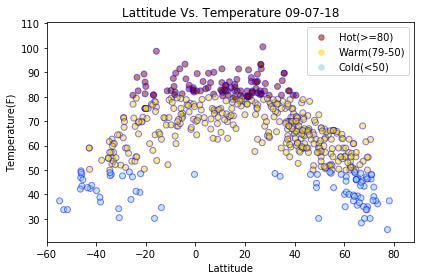

In [6]:
fig, ax = plt.subplots()
# assign axis data from our dataframe
x_axis = cities_data_df['Lattitude']
y_axis = cities_data_df['Temperature(F)']

# create color map based on temp
colors = [tempColor(temp) for temp in cities_data_df['Temperature(F)']]
# plot data (not legend as we will create one later)
plt.scatter(x_axis, y_axis, c=colors, edgecolors='b', alpha=0.5, label="__no_legend__")

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Temperature(F)")
plt.title(f"Lattitude Vs. Temperature {timestamp}")

# create items to use for data legend
temp_scale = [80,50,40]
label=['Hot(>=80)', 'Warm(79-50)', 'Cold(<50)']
# Create a legend
plt.scatter([], [], c=tempColor(temp_scale[0]), alpha=0.5, s=30,
                label=label[0])
plt.scatter([], [], c=tempColor(temp_scale[1]), alpha=0.5, s=30,
                label=label[1])
plt.scatter([], [], c=tempColor(temp_scale[2]), alpha=0.5, s=30,
                label=label[2])
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Temp Scale')
plt.legend(loc='best')

# Set x and y limits
plt.ylim(y_axis.min()-5,y_axis.max()+10)
plt.xlim(x_axis.min()-5,x_axis.max()+10)
plt.tight_layout()
# Save Figure
plt.savefig('output_data/lat_vs_temp.png')

#### Latitude vs. Humidity Plot

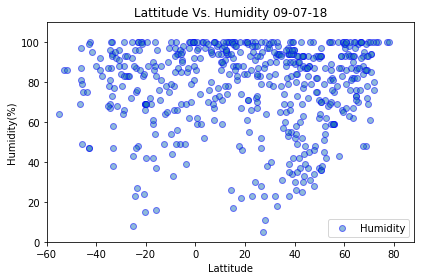

In [7]:
fig, ax = plt.subplots()
# assign axis data from our dataframe
x_axis = cities_data_df['Lattitude']
y_axis = cities_data_df['Humidity']

# plot data (not legend as we will create one later)
plt.scatter(x_axis, y_axis, edgecolors='b', alpha=0.5)
# Use default legend
plt.legend(loc="best")
# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Humidity(%)")
plt.title(f"Lattitude Vs. Humidity {timestamp}")

# Set x and y limits
plt.ylim(y_axis.min()-5,y_axis.max()+10)
plt.xlim(x_axis.min()-5,x_axis.max()+10)
plt.tight_layout()
# Save Figure
plt.savefig('output_data/lat_vs_hum.png')

#### Latitude vs. Cloudiness Plot

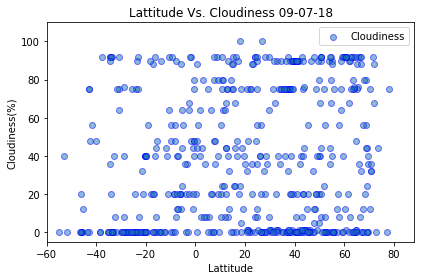

In [8]:
fig, ax = plt.subplots()
# assign axis data from our dataframe
x_axis = cities_data_df['Lattitude']
y_axis = cities_data_df['Cloudiness']
# plot data
plt.scatter(x_axis, y_axis, edgecolors='b', alpha=0.5)
# Use default legend
plt.legend(loc="best")
# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"Lattitude Vs. Cloudiness {timestamp}")

# Set x and y limits
plt.ylim(y_axis.min()-5,y_axis.max()+10)
plt.xlim(x_axis.min()-5,x_axis.max()+10)
plt.tight_layout()
# Save Figure
plt.savefig('output_data/lat_vs_cld.png')

#### Latitude vs. Wind Speed Plot

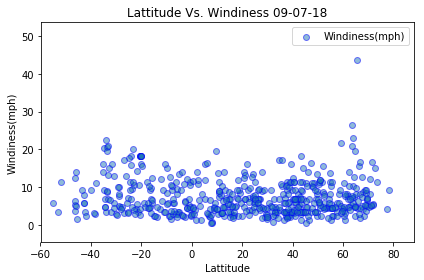

In [9]:
fig, ax = plt.subplots()
# assign axis data from our dataframe
x_axis = cities_data_df['Lattitude']
y_axis = cities_data_df['Windiness(mph)']
# plot data
plt.scatter(x_axis, y_axis, edgecolors='b', alpha=0.5)
# Use default legend
plt.legend(loc="best")
# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Windiness(mph)")
plt.title(f"Lattitude Vs. Windiness {timestamp}")

# Set x and y limits
plt.ylim(y_axis.min()-5,y_axis.max()+10)
plt.xlim(x_axis.min()-5,x_axis.max()+10)
plt.tight_layout()
# Save Figure
plt.savefig('output_data/lat_vs_wnd.png')